<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Time Series Theory in Python - Part 1: Exploratory Time Series Analysis

This notebook focuses on introducing basic concepts of time series analysis for univariate time series and then extending to some specific analysis for multivariate time series. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

from numpy.random import normal
from numpy import random

from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.stattools import ccf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from PythonTsa.datadir import getdtapath
dtapath=getdtapath()

## 1. Stationarity and Linear Behaviour

Stationarity is a fundamental concept in time series analysis, indicating that a time series has constant mean and variance over time. Understanding stationarity is crucial because many forecasting methods rely on the assumption that the data is stationary to produce accurate predictions. Recognizing whether data is stationary or non-stationary helps in selecting the appropriate analytical techniques and models.

In contrast to non-stationary, nonlinearity refers to relationships in the data that cannot be accurately described by linear models. These two concepts can coexist, as a nonstationary time series may exhibit non-linear patterns, which can complicate the analysis. Additionally, nonstationarity can obscure underlying non-linear relationships, making it challenging to discern true patterns.

The following code block demonstrates non-stationarity due to both an increasing trend and seasonal fluctuations in the synthetic time series.

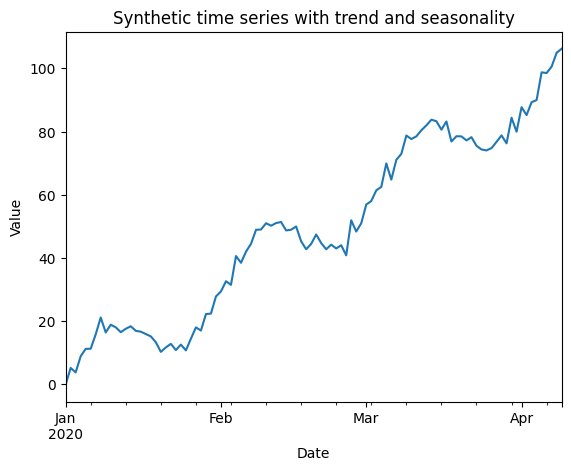

In [4]:
# Generate synthetic time series data
time = pd.date_range(start="2020-01-01", periods=100)
trend = np.arange(100)  # Linear trend as a NumPy array
seasonal = [10 * np.sin(i / 5) for i in range(100)]  # Seasonal component
noise = np.random.normal(0, 2, size=100)  # Random noise

# Combine trend, seasonal, and noise components into one array
data = trend + seasonal + noise

# Create DataFrame
series = pd.Series(data, index=time)

# Plot the time series
series.plot()
plt.title("Synthetic time series with trend and seasonality")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## 2. Autocorrelation

Autocorrelation is a statistical measure that assesses how a time series is correlated with its past values. Essentially, it tells us whether and how current values in the series are influenced by previous values at different time intervals (or lags). Autocorrelation therefore helps identify patterns in the data (e.g. trends; seasonality), and reveals the strength and direction of relationships over time. Many time series models, like ARIMA, use autocorrelation as a key component in their calculations. 

## 2.1 Autocorrelation Function (ACF)

The ACF Plot measures the correlation between the current observation in a time series and its past values. It illustrates how current values are related to their previous values over different time intervals, highlighting any patterns or dependencies in the data. Analyzing the ACF is essential for identifying the presence of trends or seasonality and determining the appropriate order of the moving average component in models like ARIMA.

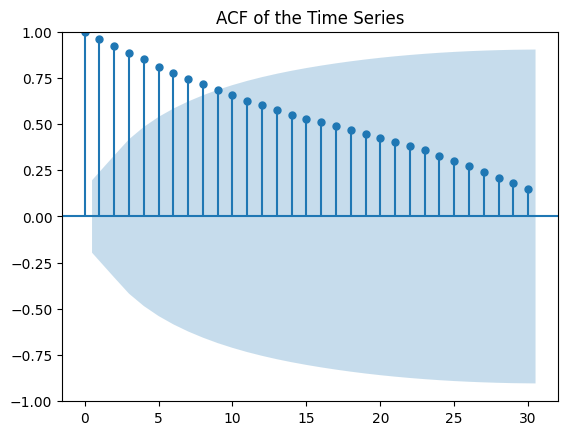

In [5]:
plot_acf(series, lags=30, alpha=0.05) # alpha=0.05 is the default)
plt.title("ACF of the Time Series")
plt.show()

The **autocorrelation values** (represented by the bars) gradually decrease over time. At lag 0, the autocorrelation is always 1 (by definition), showing a perfect correlation with itself. The presence of a clear upward trend in the time series contributes to the high autocorrelation values that decay slowly with increasing lags. This slow decay is typical of a non-stationary series with a trend, indicating that past values continue to influence future values significantly.

The first several lags (up to around lag 10) exhibit high autocorrelation values. Most of these early lags extend beyond the shaded blue area, which represents the 95% **confidence interval**, indicating that they are statistically significant. This significance means that past values have a substantial influence on current values. As the lags increase, the confidence bands widen, signifying increased uncertainty in the autocorrelation estimates. A wide confidence band suggests that the time series exhibits non-consistent behavior with significant changes over time.

## 2.2 Partial Autocorrelation Function (PACF)

The PACF Plot helps identify the direct relationship between the current observation in a time series and its past values while excluding the influence of intermediate lagged values. It shows how strongly the current observation is related to a specific past observation, providing insights into the unique connection between them. Analyzing the PACF is crucial for determining the appropriate order of the autoregressive component in models like ARIMA, which improves forecasting accuracy.

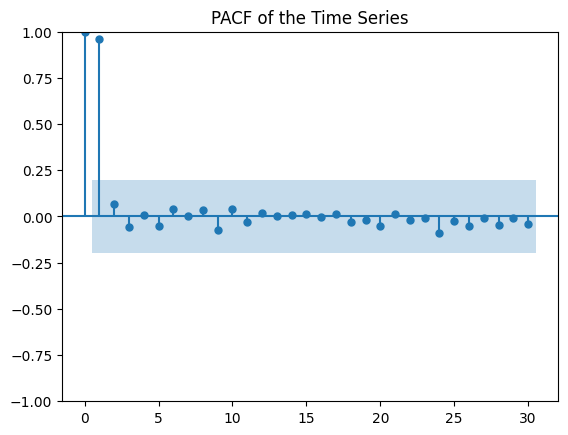

In [6]:
plot_pacf(series, lags=30)
plt.title("PACF of the Time Series")
plt.show()

Only the first and second lags exhibit significant correlations, as indicated by their position outside the shaded confidence interval. This suggests that only these two lags have a direct influence on the current value of the series. Although the time series displays a trend (indicating non-stationarity), the PACF still identifies significant values primarily at the first two lags.

## 2.3 Lag Plot

The Lag Plot provides a scatter plot that compares the values of a time series to its lagged values, helping to identify any linear relationships between them. Linear relationships observed in a Lag Plot suggest dependence on past values.

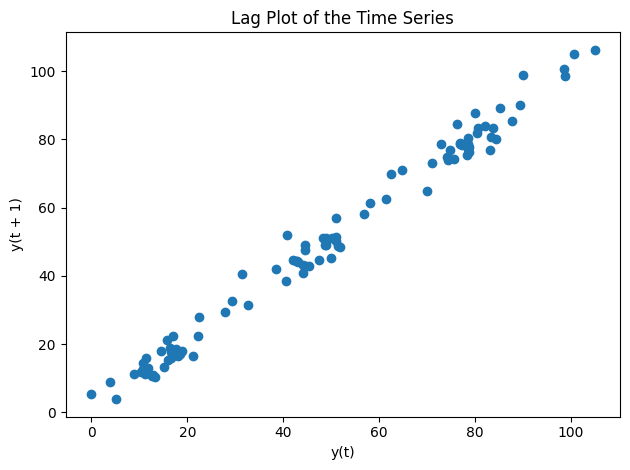

In [7]:
lag_plot(series)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

An upward trend in a Lag Plot can mean that current values increase with past values. However, this trend can also result from seasonality, where the values fluctuate consistently within certain time frames. To tell the difference, we can look for repeated patterns at specific lags (which indicates seasonality) versus a steady increase over time (which indicates a trend).

**Exercise:** Generate synthetic time series data without a trend and analyze it for stationarity by examining its autocorrelation properties.

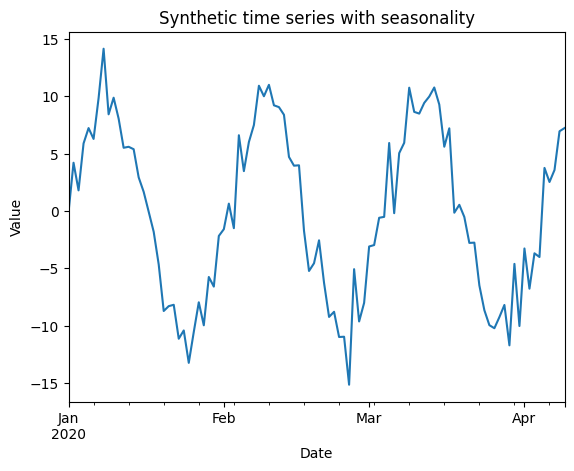

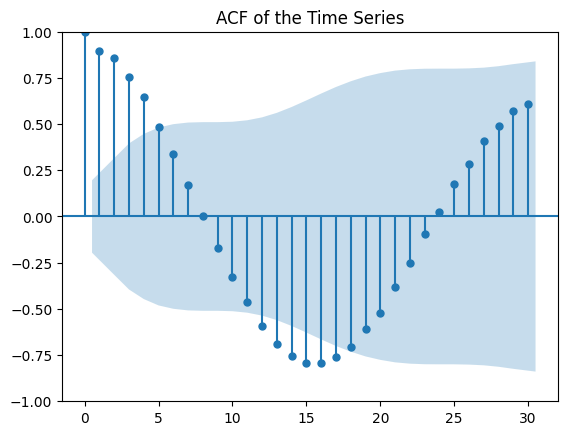

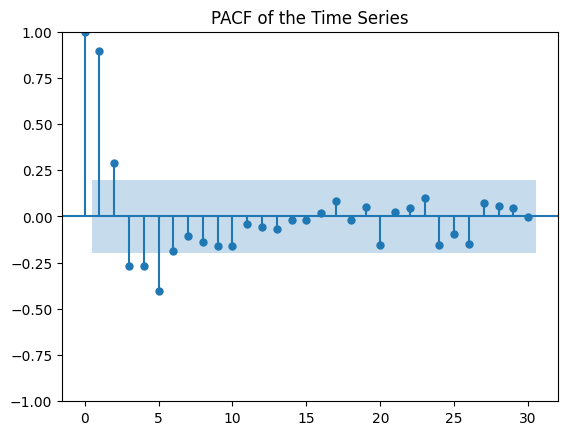

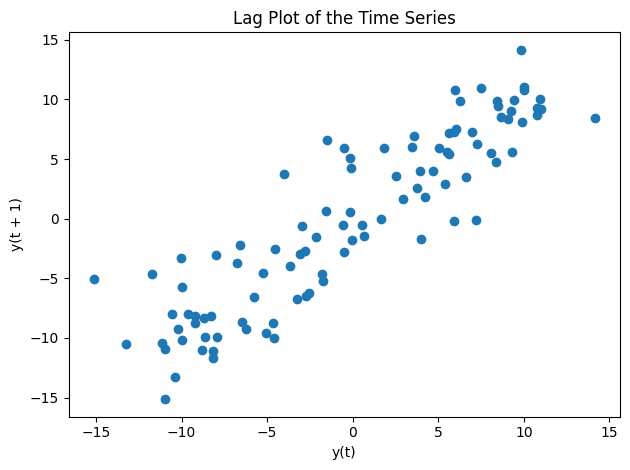

In [8]:
# Combine only seasonal and noise components into one array
data2 = seasonal + noise

# Create DataFrame
series2 = pd.Series(data2, index=time)

# Plot the time series
series2.plot()
plt.title("Synthetic time series with seasonality")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Plot ACF
plot_acf(series2, lags=30, alpha=0.05)
plt.title("ACF of the Time Series")
plt.show()

# Plot PACF
plot_pacf(series2, lags=30)
plt.title("PACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(series2)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

### **Example 1: Chinese Quarterly GDP**

The Chinese Quarterly GDP time series exhibits a clear increasing trend along with increasing seasonal effects (non-stationary behavior).

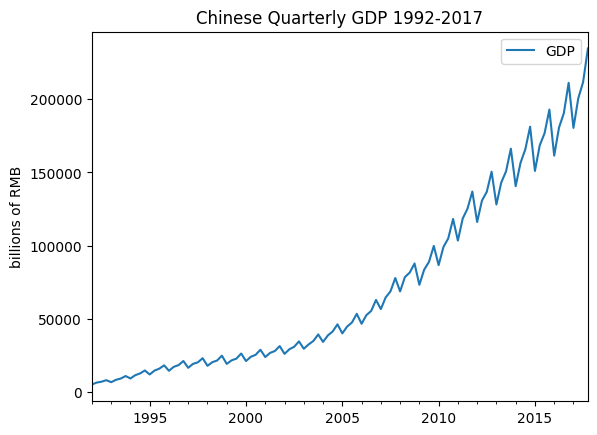

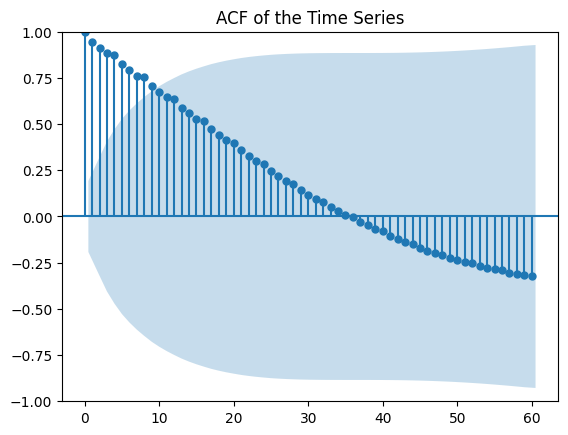

<Figure size 640x480 with 0 Axes>

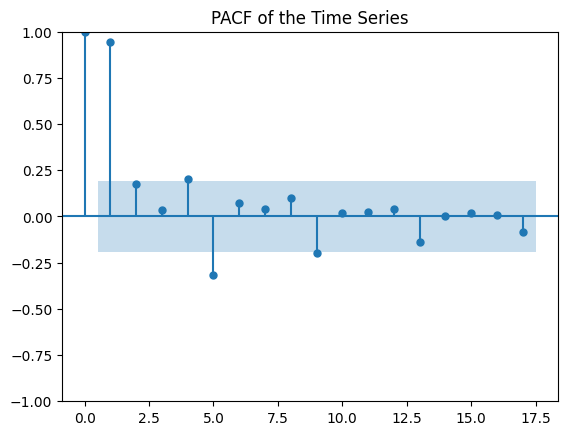

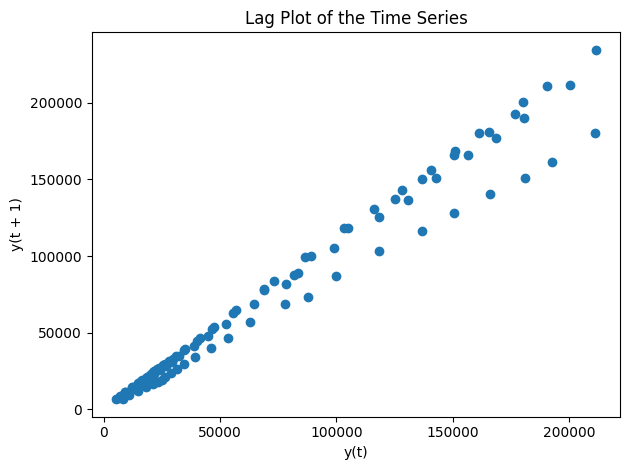

In [9]:
# Load the data
gdp = pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(gdp),freq='QE')
gdp.index=dates

# Plot the time series
gdp.plot()
plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('billions of RMB')
plt.show()

# Plot ACF
plot_acf(gdp, lags=60)
plt.title("ACF of the Time Series")
plt.show()

# Plot PACF
fig = plt.figure()
plot_pacf(gdp, lags=17)
plt.title("PACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(gdp)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

### **Example 2: Quarterly Exchange Rates of GBP to NZ Dollar**

The time series shows relatively complex fluctuations with clear phases of increase, decrease and then increase again (non-stationary behavior).

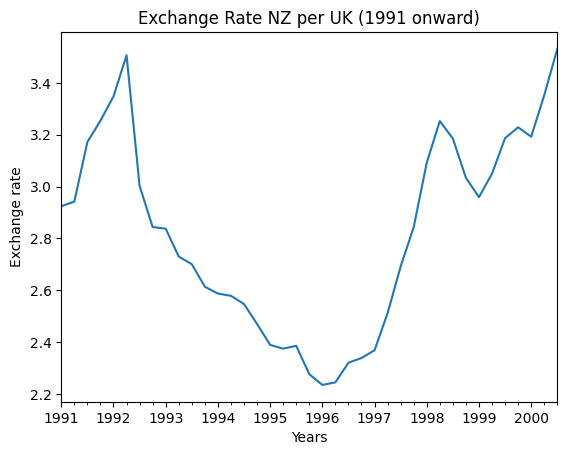

<Figure size 640x480 with 0 Axes>

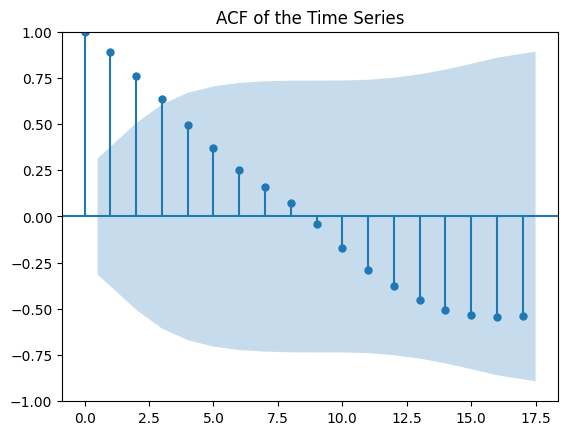

<Figure size 640x480 with 0 Axes>

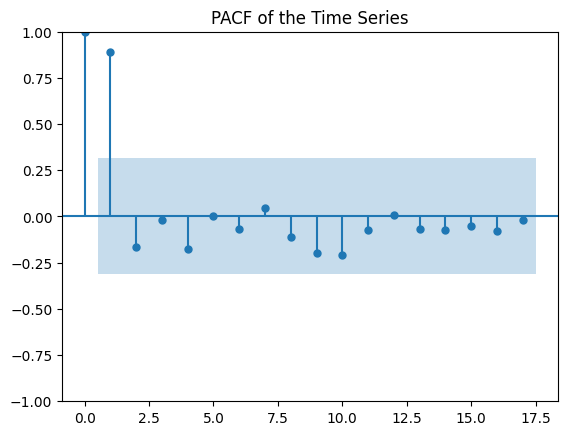

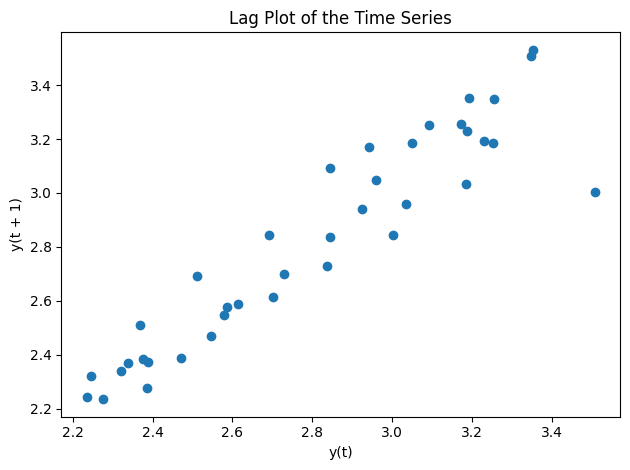

In [10]:
# Load the exchange rate data
exchange = pd.read_csv(dtapath + 'ExchRate NZ per UK.txt', header=0)

# Create a date range starting from 1991 with quarterly frequency
dates = pd.date_range('1991', periods=len(exchange), freq='QE')

# Set the index to the created date range
exchange.index = dates

# Create a time series from the 'xrate' column
exchange = pd.Series(exchange['xrate'])

# Plot the time series
exchange.plot()
plt.xlabel('Years')
plt.ylabel('Exchange rate')
plt.title('Exchange Rate NZ per UK (1991 onward)')
plt.show()

# Plot ACF
fig = plt.figure()
plot_acf(exchange, lags=17)
plt.title("ACF of the Time Series")
plt.show()

# Plot PACF
fig = plt.figure()
plot_pacf(exchange, lags=17)
plt.title("PACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(exchange)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

### **Example 3: The NAO Index Since January 1950**

The time series is the monthly mean North Atlantic Oscillation (NAO) index since January 1950. From the time series plot and plots showing and autocorrelation, we could say that the time series appears stationary.

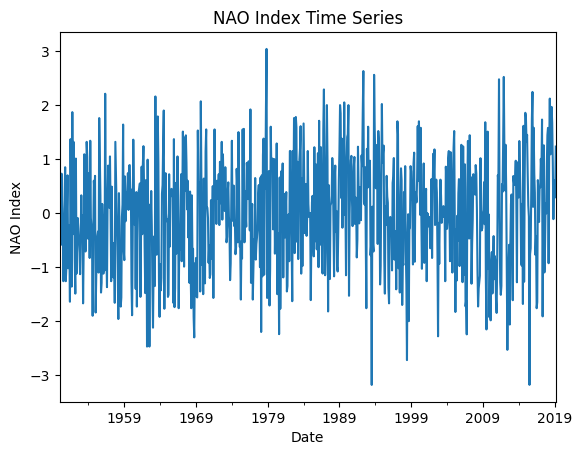

<Figure size 640x480 with 0 Axes>

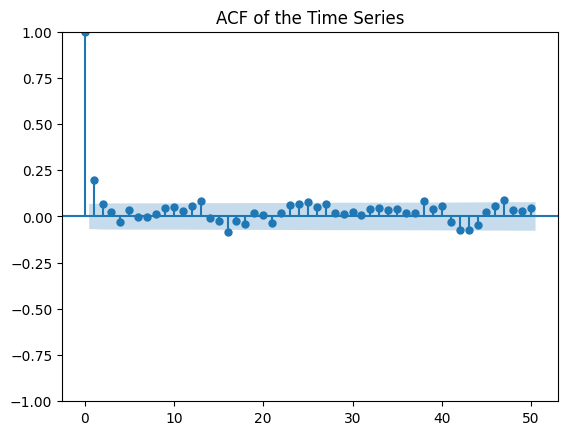

<Figure size 640x480 with 0 Axes>

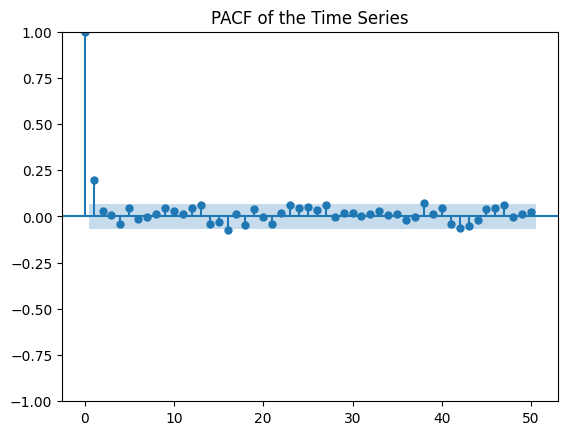

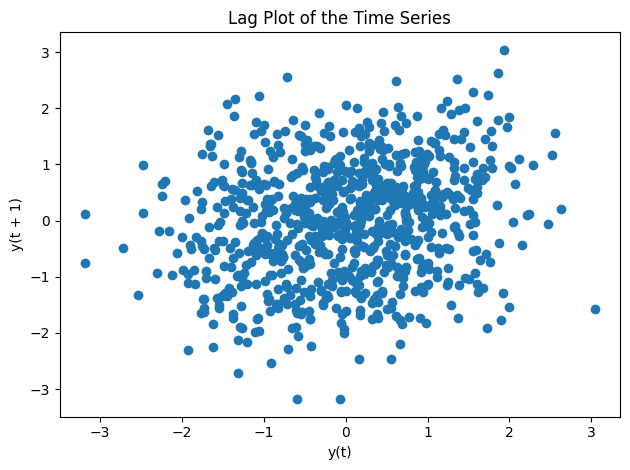

In [11]:
# Load the NAO dataset
nao = pd.read_csv(dtapath + 'nao.csv', header=0)

# Create a time index
timeindex = pd.date_range('1950-01', periods=len(nao), freq='ME')
nao.index = timeindex

# Extract NAO index as a Series
naots = nao['index']  # Ensure 'index' corresponds to the correct column name

# Plot the NAO index time series
naots.plot(title='NAO Index Time Series', xlabel='Date', ylabel='NAO Index')
plt.show()

# Plot ACF
fig = plt.figure()
plot_acf(naots, lags=50)
plt.title("ACF of the Time Series")
plt.show()

# Plot PACF
fig = plt.figure()
plot_pacf(naots, lags=50)
plt.title("PACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(naots)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

## 3. Random walks

A random walk is a mathematical model that describes a path consisting of a series of random steps. In a random walk, the next value is the sum of the previous value and a random change, making it useful for modeling uncertainty and variability.

In the context of Earth Sciences, it can be used to represent processes like the dispersal of pollutants in the atmosphere or the movement of animal populations in ecology, where the future position or state is influenced by random changes rather than a predictable trend. 

Three simulated paths (time plots) of the standard normal random walk:

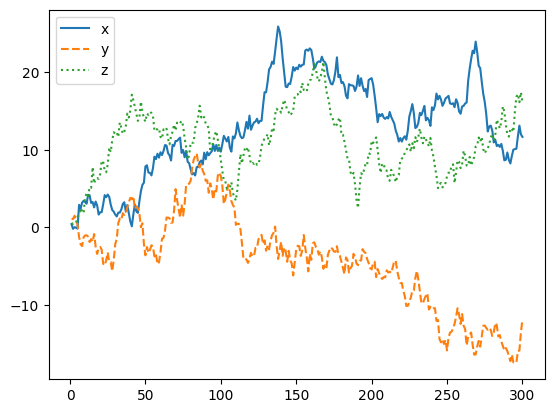

In [12]:
np.random.seed(1357)
a=normal(size=300); b=normal(size=300); c=normal(size=300)
x = np.cumsum(a); y=np.cumsum(b); z=np.cumsum(c)
xyz = pd.DataFrame({'x': x, 'y': y, 'z': z})
xyz.index = range(1,301)
xyz.plot(style=['-', '--', ':']); plt.show() # style means matplotlib line style per column

## 4. White noise

## 4.1 Simulating a Gaussian white noise

Gaussian white noise is a random signal that has equal intensity at all frequencies, making it useful for representing random fluctuations in data that follow a normal distribution. 

To intuitively test whether a stationary time series is white noise, we can examine its ACF plot: if the plot resembles this figure, we are inclined to conclude that the time series is indeed white noise.

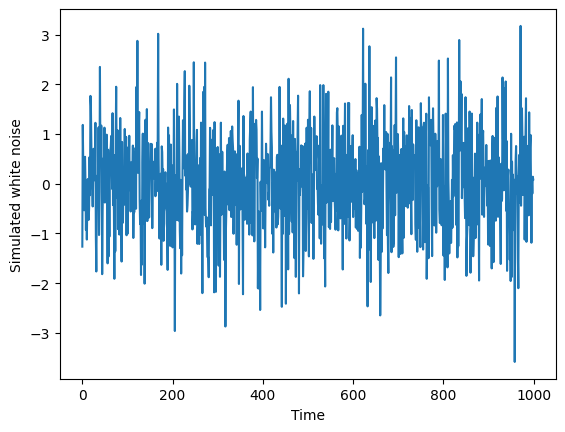

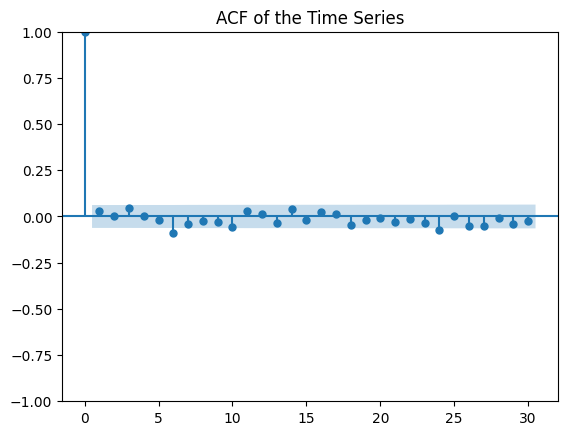

In [13]:
random.seed(135) # for repeat
x = random.normal(loc=0, scale=1, size=1000)
xts = pd.Series(x)
xts.plot(); plt.xlabel('Time')
plt.ylabel('Simulated white noise')
plt.show()

plot_acf(xts, lags=30) # plotting ACF
plt.title("ACF of the Time Series")
plt.show()

## 4.2 Chaos like a white noise

In [14]:
# Initialize an empty pandas Series with a float data type
x = pd.Series(dtype=float)

# Start value for y
y = 0.3

# Use a for loop to generate the values
for t in range(1, 501):
    y = 4.0 * y * (1 - y)  # Logistic map equation
    x.loc[t-1] = y  # Assigning the value at index t-1

# Set the index of the series to be in the range 1 to 500
x.index = range(1, 501)

# Display the result
print(x)

1      0.840000
2      0.537600
3      0.994345
4      0.022492
5      0.087945
         ...   
496    0.078175
497    0.288255
498    0.820656
499    0.588720
500    0.968515
Length: 500, dtype: float64


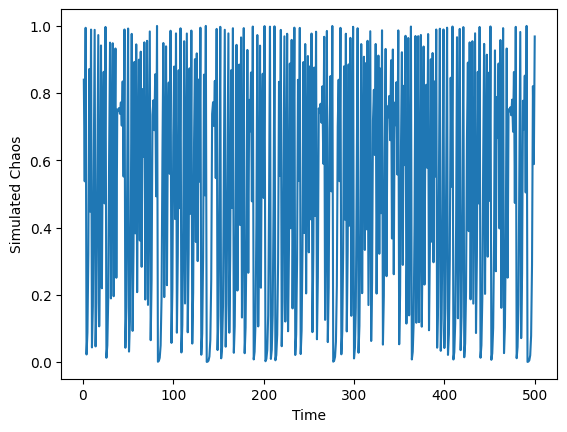

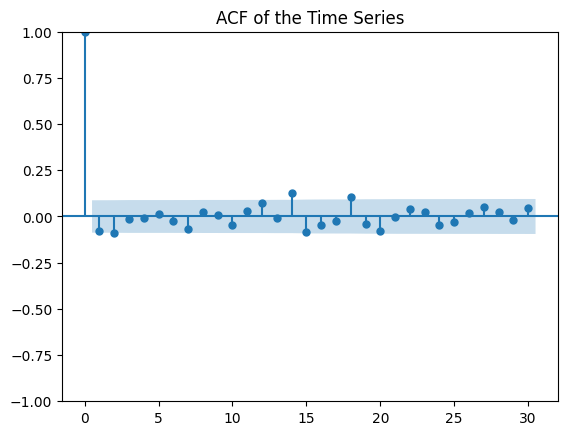

In [15]:
x.plot()
plt.xlabel('Time')
plt.ylabel('Simulated Chaos')
plt.show()

plot_acf(x, lags=30) # plotting ACF
plt.title("ACF of the Time Series")
plt.show()

## 4.3 White noise test

How to statistically test whether a stationary time series is white noise:

If the ACF values for lags other than zero are close to zero and fall within the confidence intervals, the series is likely white noise. However, if any ACF values are significantly different from zero, it indicates that the series is not white noise due to the presence of correlations.

Besides visual analysis, statistical methods for testing whether a stationary time series is a white noise or not exist. The Ljung-Box statistic checks if there are significant autocorrelations at multiple lags. The null hypothesis is that the data are independently distributed (i.e., white noise). If the p-value is low (commonly less than 0.05), we reject the null hypothesis.

### **Example 2 [continues]: Quarterly Exchange Rates of GBP to NZ Dollar**

The quarterly exchange rates of GBP to NZD are a financial time series. We often analyze their logarithms because this stabilizes the average and variability, reduces trends, and makes the data more normal. This is important due to the volatility in financial data. Logging also highlights relative changes instead of absolute values, which is key for understanding percentage returns and growth rates in finance.

In [16]:
# Logarithm of the series:
logxts = np.log(exchange)

We need to difference the time series to achieve stationarity before testing for white noise. Differencing is more closely investigated in notebook C2.

In [17]:
dlogxts = logxts.diff(1).dropna()  # Remove NaN values resulting from differencing

Test for white noise:

The time series differences of the log quarterly exchange rates seems to have neither trend nor seasonality and the ACF plot looks similar to the ACF plot of a white noise. The p-values from the Ljung-Box test suggest that the time series behaves like white noise at higher lags since the p-values for those lags are larger than 0.05, indicating no significant autocorrelation. However, since the earlier p-values (for the first lags) indicate some level of autocorrelation, we can't definitively say that the entire differentiated time series is purely white noise. It is approaching white noise behavior but might still have some dependencies at the initial lags. 

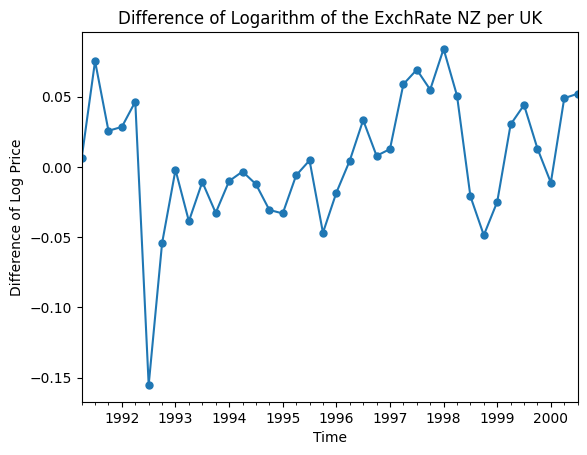

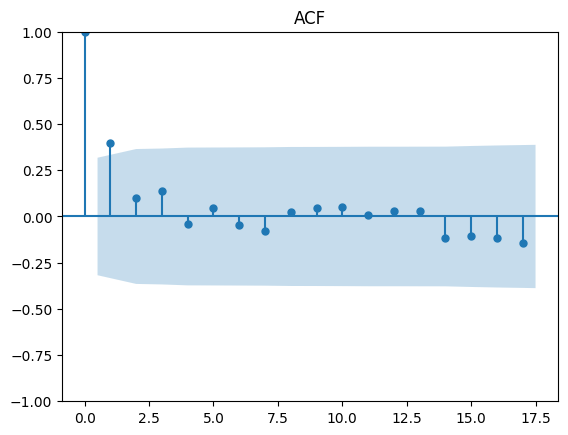

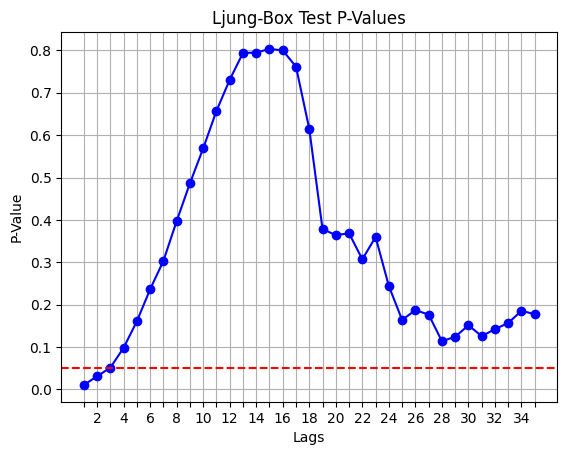

In [18]:
# Plotting the differenced logarithmic series
dlogxts.plot(marker='o', markersize=5)
plt.title('Difference of Logarithm of the ExchRate NZ per UK')
plt.xlabel('Time')
plt.ylabel('Difference of Log Price')
plt.show()

# Plotting the ACF
plot_acf(dlogxts, lags=17)
plt.title("ACF")
plt.show()

# Perform the Ljung-Box test for residuals
    # Calculate Ljung-Box test statistics and p-values
ljung_box_results = acorr_ljungbox(dlogxts, lags=35, return_df=True)
    # Create a plot for the p-values
plt.figure()
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='b')
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% significance level
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.xticks(np.arange(0, 36, 1))
plt.xticks(ljung_box_results.index)  # Set x-ticks to all lags
plt.gca().set_xticklabels([str(int(x)) if x % 2 == 0 else '' for x in ljung_box_results.index])
plt.grid()
plt.show()

## 5. Time Series Components: Time Series Decomposition

In practice, many real-world time series exhibit either deterministic seasonality or a deterministic trend component. Some of them may have both. After extracting the trend and seasonal components from a time series, the remainder is its random (variation) component. Decomposing a time series can be quite beneficial for gaining insights into its structure and can serve as a pre-processing step for modeling (see notebook C3).

### **Example 1 [continued]: Chinese Quarterly GDP** 

The time series exhibits an increasing trend and seasonality. In the following, both additive and multiplicative decomposition methods are employed to create a time series where the residuals are like those of a stationary series. However, the results of the decomposition are unsatisfactory, as certain structures within the time series remain concealed. Instead, the Holt-Winters smoothing technique, which is particularly well-suited for macroeconomic data, would likely yield better results in this context.

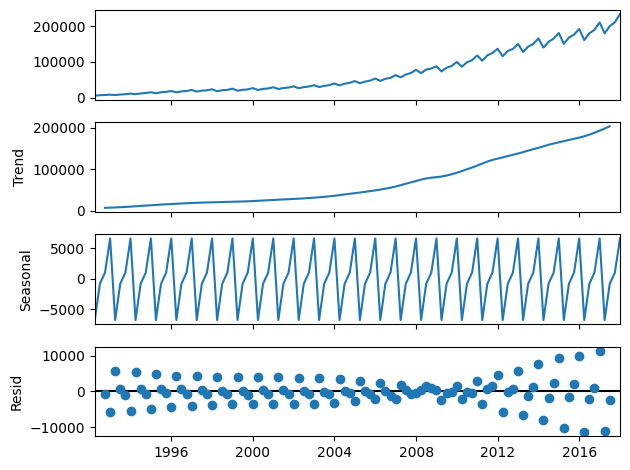

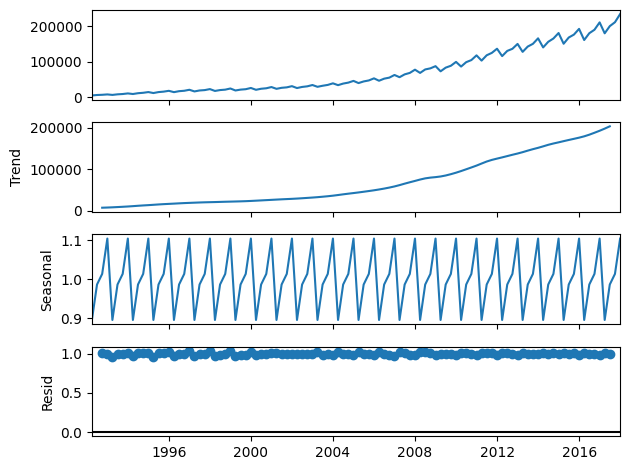

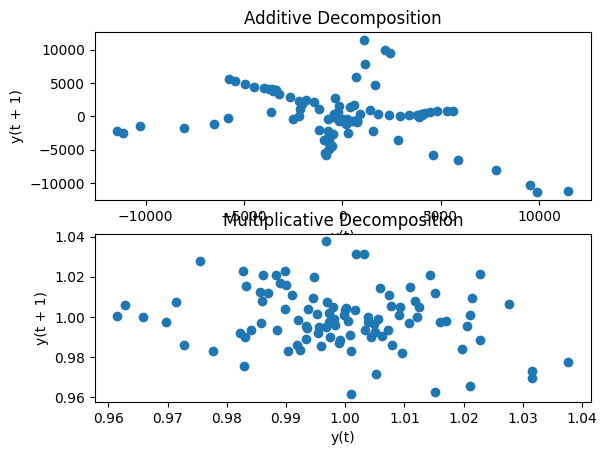

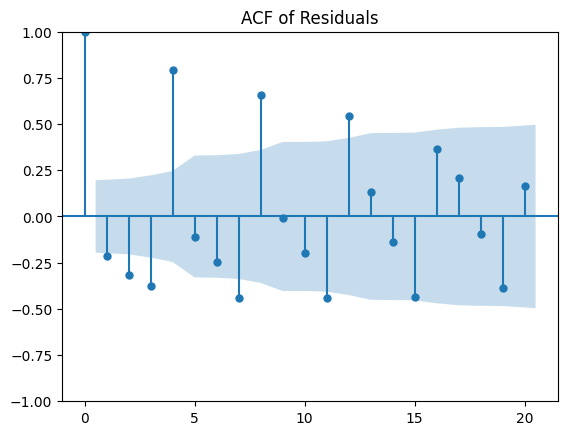

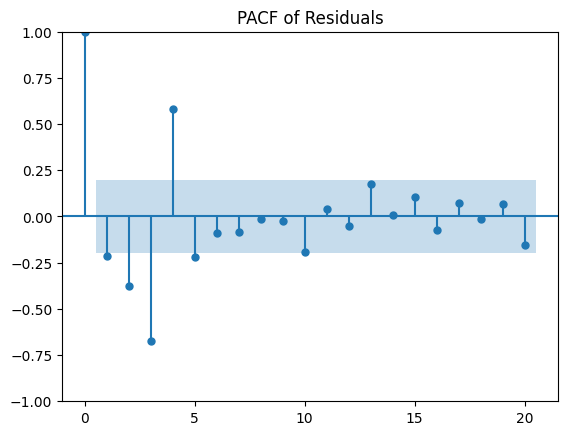

In [19]:
# Time Series Decomposition
xdeca = seasonal_decompose(gdp, model='additive')
xdecm = seasonal_decompose(gdp, model='multiplicative')

# Plot decompositions
xdeca.plot()
plt.show()
xdecm.plot()
plt.show()

# Lag Plot for Residuals
fig = plt.figure()
lag_plot(xdeca.resid, ax=fig.add_subplot(211))
plt.title('Additive Decomposition')
lag_plot(xdecm.resid, ax=fig.add_subplot(212))
plt.title('Multiplicative Decomposition')
plt.show()

# Process Residuals
xdecmResid = xdecm.resid.dropna()  # Drop NA values

# Plot ACF and PACF for the residuals
plot_acf(xdecmResid, lags=20)
plt.title('ACF of Residuals')
plt.show()
plot_pacf(xdecmResid, lags=20)
plt.title('PACF of Residuals')
plt.show()

### **Example 4: Australian Employed Total Persons**

The "Australia Employed Total Persons" dataset tracks the monthly total number of employed people in Australia from February 1978 to November 2018. Initially, the time series shows a steady upward trend with no apparent seasonality. However, when zooming in on data from January 2013 to January 2017, clear seasonal patterns emerge, repeating every year. Seasonal plots confirm that these patterns are consistent with little variation over time.

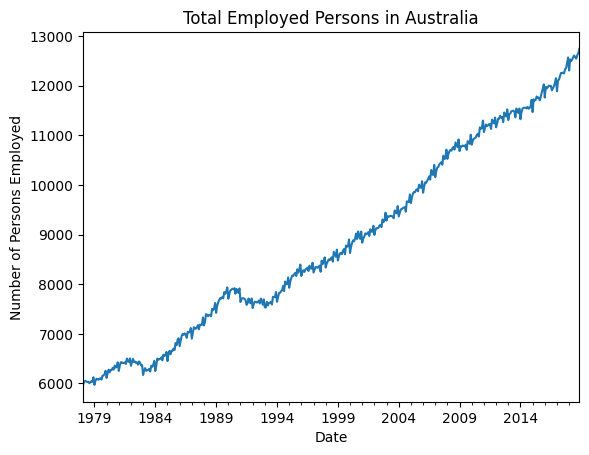

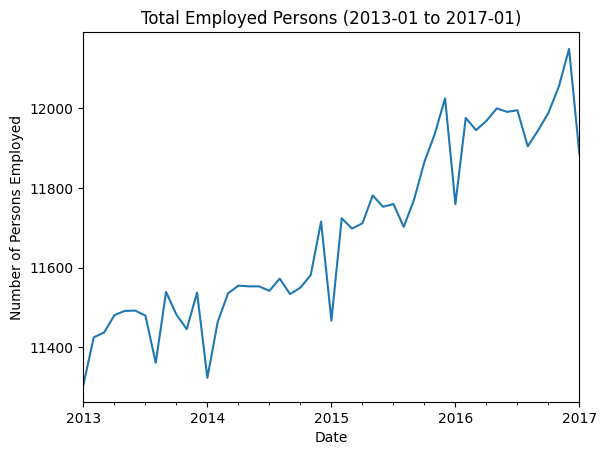

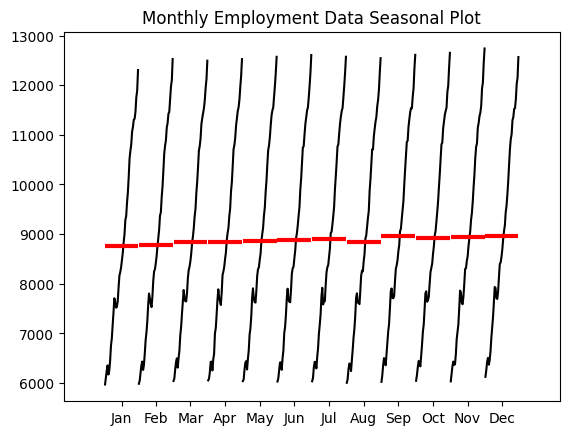

In [20]:
# Get the data file path
dtapath = getdtapath()

# Load the Excel file containing employment data
aul = pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header=0)

# Create a time index starting from February 1978 with monthly frequency
timeindex = pd.date_range('1978-02', periods=len(aul), freq='ME')
aul.index = timeindex

# Extract the 'EmployedP' column for analysis
aults = aul['EmployedP']

# Plot the time series
aults.plot()
plt.title('Total Employed Persons in Australia')
plt.ylabel('Number of Persons Employed')
plt.xlabel('Date')
plt.show()

# Graph time series plot from January 2013 to January 2017
aults['2013-01':'2017-01'].plot()
plt.title('Total Employed Persons (2013-01 to 2017-01)')
plt.ylabel('Number of Persons Employed')
plt.xlabel('Date')
plt.show()

# Plot seasonal plots
month_plot(aults)
plt.title('Monthly Employment Data Seasonal Plot')
plt.show()

Using an additive model to decompose the time series:

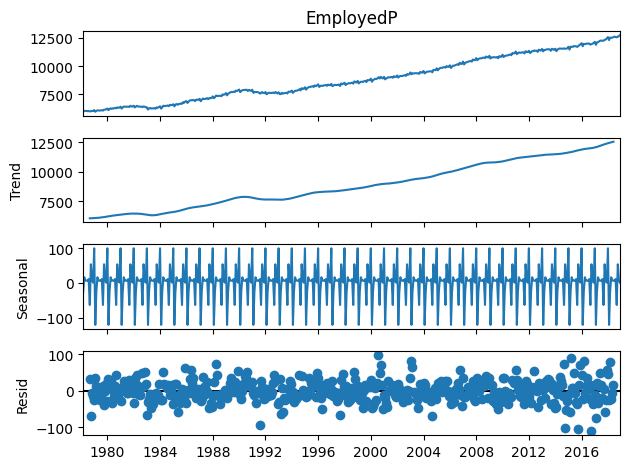

In [21]:
# Decompose the time series using an additive model (Time series = Trend + Seasonality + Residual)
aultsdeca = seasonal_decompose(aults, model='additive', period=12)
aultsdeca.plot()
plt.show()

After decomposition, the residuals should ideally represent the random noise, indicating successful removal of trends and seasonal patterns. We can adress this, for example, by plotting the ACF of the residuals to ensure residuals exhibit insignificant autocorrelation, indicating no remaining patterns; by testing for normality to confirm the residuals are distributed as expected random noise; by checking rolling means and standard deviations to ensure stationarity, as constant values indicate effective decomposition.

We see that the residuals are mostly stationary, though there are seasonal correlations at specific lags, and represent represent the random noise.

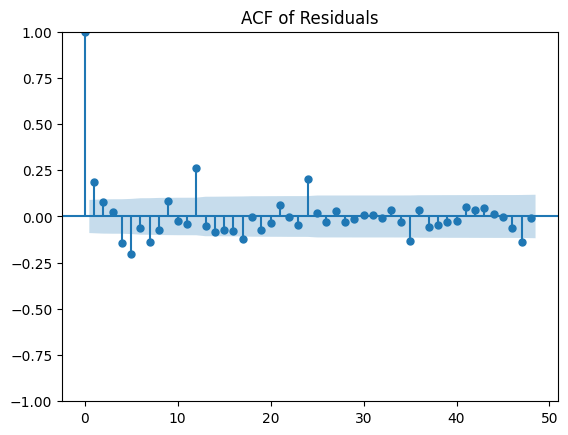

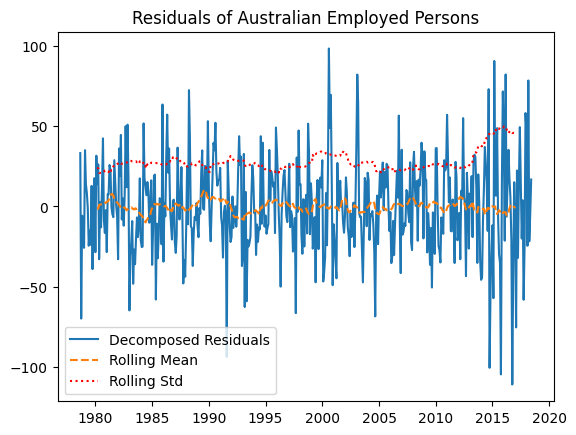

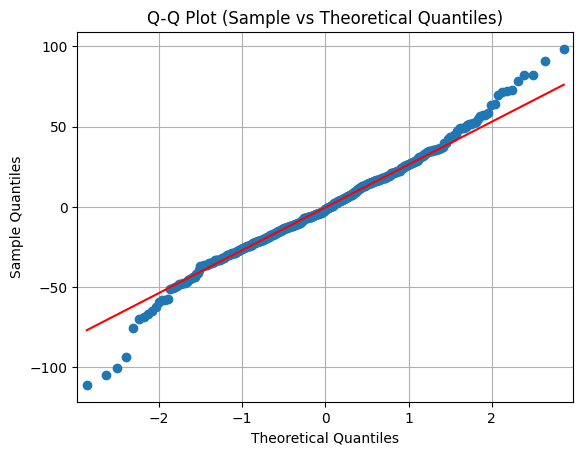

In [22]:
# Extract residuals from the decomposition and drop NaN values
aultsdecaResid = aultsdeca.resid.dropna()

# Plot ACF of the residuals
plot_acf(aultsdecaResid, lags=48)
plt.title('ACF of Residuals')
plt.show()

# Rolling mean and standard deviation
rolm = aultsdecaResid.rolling(window=36, center=True).mean()
rolstd = aultsdecaResid.rolling(window=36, center=True).std()

# Plotting residuals, rolling mean, and rolling std
plt.plot(aultsdecaResid, label='Decomposed Residuals')
plt.plot(rolm, label='Rolling Mean', linestyle='--')
plt.plot(rolstd, label='Rolling Std', linestyle=':', c='red')
plt.title('Residuals of Australian Employed Persons')
plt.legend()
plt.show()

# Q-Q plot to test for normality
plt.figure()
sm.qqplot(aultsdecaResid, line='q', ax=plt.gca())
plt.title('Q-Q Plot (Sample vs Theoretical Quantiles)')
plt.grid()

## 6. Multivariate Time Series

In multivariate time series analysis, we examine multiple interrelated variables simultaneously instead of just one. This analysis helps us understand how these variables influence each other over time and enables joint forecasting. The methods used for analyzing single time series can often be adapted for multivariate scenarios, but it becomes essential to consider how the interactions between these variables affect their individual behaviors. The following are some specific analyses that demonstrate the exploration of the dynamic relationships and dependencies inherent in multivariate datasets and time series (non-exhaustive).

### **Example 5: Large Dataset of Synthetic Time Series**

We generate multiple correlated time series with trend, seasonal effect and random noise:

/tmp/ipykernel_62/683510264.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2000-01-01', periods=100, freq='M')


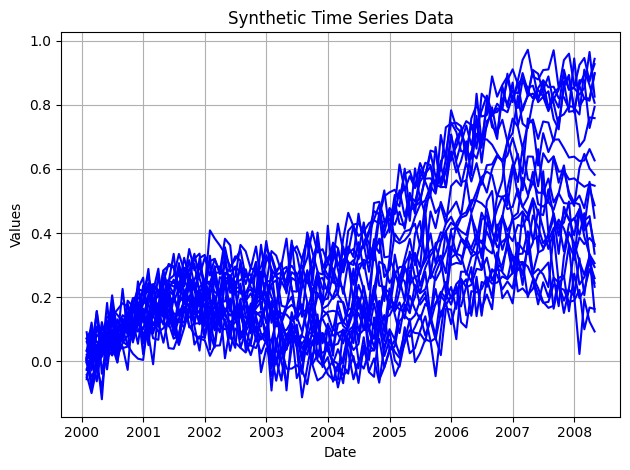

In [23]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
dates = pd.date_range('2000-01-01', periods=100, freq='M')

# Create a DataFrame to hold the time series
data = pd.DataFrame(index=dates)

# Generate time series
n_series = 24
for i in range(1, n_series + 1):  # 24 time series
    trend = np.linspace(0, np.random.uniform(0.1, 1), len(dates))  # Linear trend
    seasonal = 0.1 * np.sin(np.linspace(0, 3 * np.pi, len(dates)))  # Seasonal effect
    noise = np.random.normal(loc=0, scale=0.05, size=len(dates))  # Random noise
    series = trend + seasonal + noise  # Combine to create the time series
    data[f'Series_{i}'] = series

# Plotting all the time series
plt.figure()
for column in data.columns:
    plt.plot(data.index, data[column], label=column, color='blue')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()  # Adjust the layout
plt.show()

## 6.1 Pearson Correlation

Pearson correlation measures how strong and in what direction two continuous variables are related. It ranges from -1 to 1: a value of 1 means a perfect positive relationship, -1 means a perfect negative relationship, and 0 means no relationship. It looks at how much one variable changes in relation to another and is commonly used to understand connections between variables.

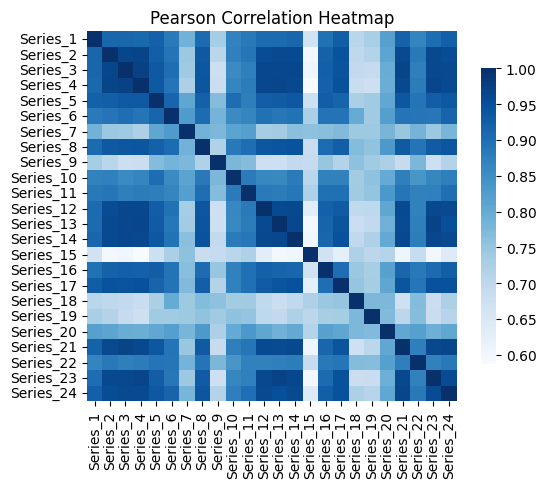

Most Correlated Series: Series_4 and Series_3


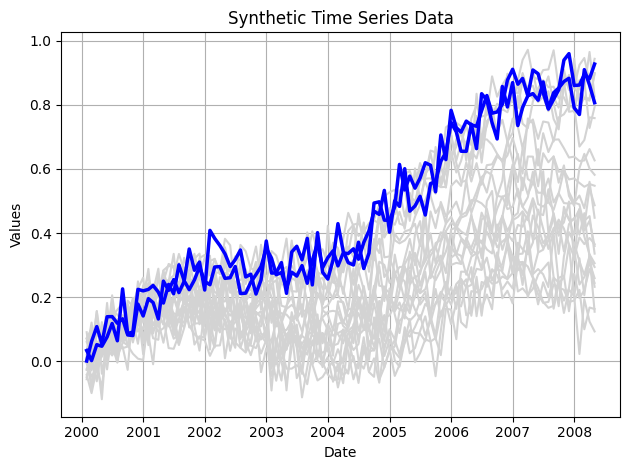

In [24]:
# calculate Pearson correaltion
correlation_matrix = data.corr()

# plot heatmap
import seaborn as sns # another library for plotting
plt.figure()
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Heatmap')
plt.show()

# Find the two most correlated series
corr_values = correlation_matrix.unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values < 1.0] # Exclude self-correlations (1.0) 
most_correlated_pair = corr_values.idxmax()
series1, series2 = most_correlated_pair
print(f'Most Correlated Series: {series1} and {series2}')

# Plotting all the time series, highlighting the two most correlated series
plt.figure()
for column in data.columns:
    plt.plot(data.index, data[column], label=column, color='lightgrey')
plt.plot(data.index, data[series1], label=series1, color='blue', linewidth=2.5)  # First highlighted series
plt.plot(data.index, data[series2], label=series2, color='blue', linewidth=2.5)  # Second highlighted series
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

## 6.2 Cross-Correlation Analysis

The cross-correlation function measures how similar two time series are at different time lags. Here, we focus on the cross-correlation between two selected time series and limit our examination to a maximum of 15 lags.

The plot reveals a strong correlation at lag 0, indicating that the two series change together simultaneously. As we increase the lag, the correlation slowly decreases but remains relatively high, showing a strong positive relationship that weakens over time. In summary, the plot demonstrates that the time series are closely connected, and this relationship continues even when one series is shifted over time.

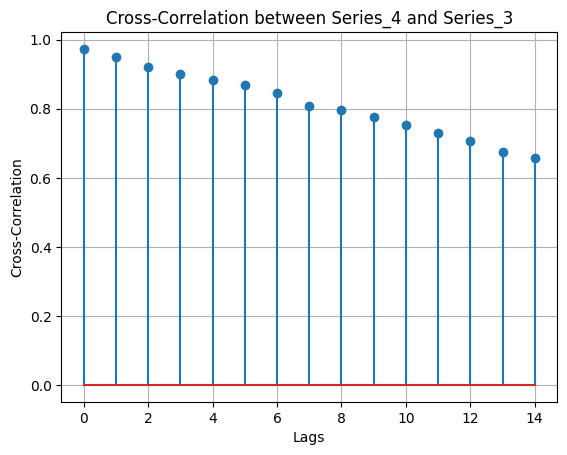

In [25]:
max_lag = 15
cross_corr = ccf(data[series1], data[series2])[:max_lag]

# Plot Cross-Correlation
plt.figure()
plt.stem(range(max_lag), cross_corr)
plt.title(f"Cross-Correlation between {series1} and {series2}")
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.grid()
plt.show()

## 6.3 Dimensionality Reduction: Principal Component Analysis (PCA)

PCA is one example of a dimensionality reduction technique used in data analysis and machine learning. It transforms a large set of variables into a smaller one while preserving as much variance as possible. By identifying the directions (principal components) in which the data varies the most, PCA can simplify complex datasets including time series.

We create a PCA model and specify that we want to keep 5 principal components (PCs). We extract these components from the standardized data (see notebook C3).

In [26]:
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Calculate PCs
pca = PCA(n_components=5)  # Adjust number of components if necessary
pca_scores = pca.fit_transform(standardized_data)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC_{i + 1}' for i in range(pca.n_components_)], index=data.index)

The explained variance in the PCA describes how much variance (or information) each PC captures. Higher values mean the component is more important. It helps us understand how many components we might need to keep for analysis. Here, already the first PC explains more than 80% of variance in the full dataset.

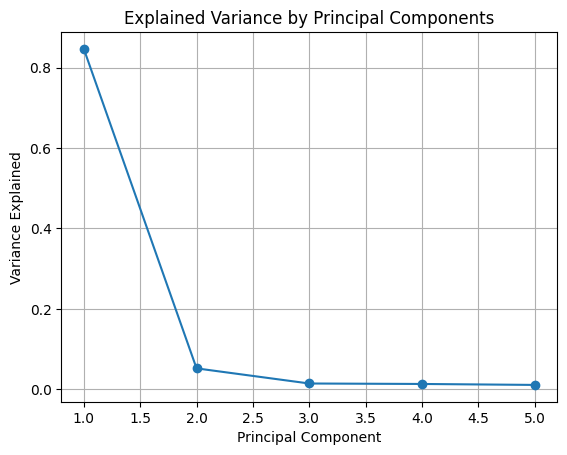

In [27]:
# Plotting the explained variance
plt.figure()
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

We visualize the values of the first two PCs over time. This helps us see how the main patterns in the data change. The scatter plot of PC1 versus PC2 visualizes the relationship between the first two principal components, illustrating how observations are distributed in the reduced dimensional space. This analysis allows us to identify clusters, trends, and potential outliers, thereby providing insights into the underlying patterns within the data.

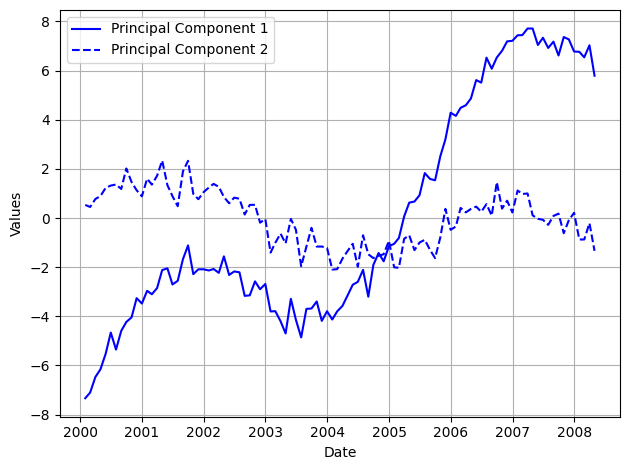

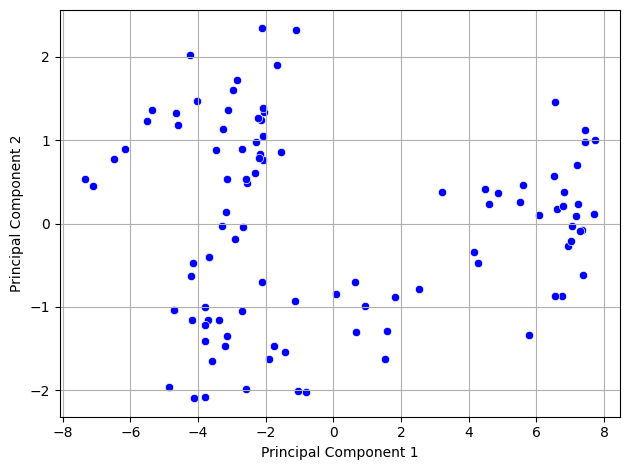

In [28]:
# Plotting the first two principal components

# time series plot
plt.figure()
plt.plot(pca_df.index, pca_df['PC_1'], label='Principal Component 1', color='blue')
plt.plot(pca_df.index, pca_df['PC_2'], label='Principal Component 2', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust the layout
plt.show()

# scatter plot
plt.figure()
sns.scatterplot(data=pca_df, x='PC_1', y='PC_2', color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.tight_layout()
plt.show()